# Using `ggplot2`

In [1]:
suppressPackageStartupMessages(library(tidyverse))

Warning message:
“Installed Rcpp (0.12.12) different from Rcpp used to build dplyr (0.12.11).
Please reinstall dplyr to avoid random crashes or undefined behavior.”Warning message:
“package ‘dplyr’ was built under R version 3.4.1”

In [2]:
head(iris)

Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1 5.1          3.5         1.4          0.2         setosa 
2 4.9          3.0         1.4          0.2         setosa 
3 4.7          3.2         1.3          0.2         setosa 
4 4.6          3.1         1.5          0.2         setosa 
5 5.0          3.6         1.4          0.2         setosa 
6 5.4          3.9         1.7          0.4         setosa

In [3]:
options(repr.plot.width=4, repr.plot.height=3)

## Map data attributes to aesthetics

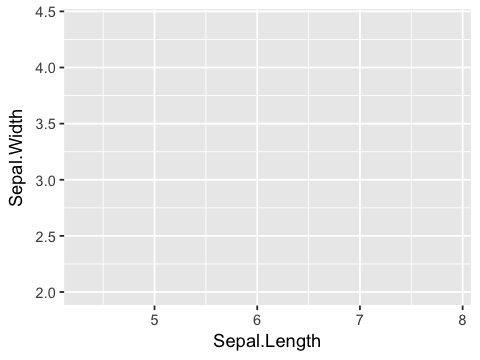

In [4]:
g <- ggplot(iris, aes(x=Sepal.Length, y=Sepal.Width, color=Species))
g

## Use different geometries for the same mapping

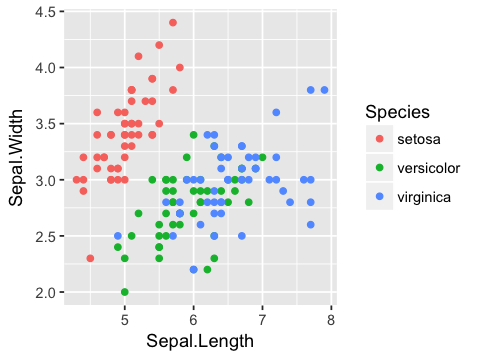

In [5]:
g + geom_point()

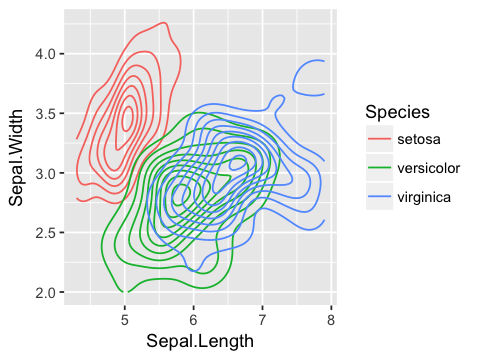

In [6]:
g + geom_density2d()

`geom_smooth()` using method = 'loess'


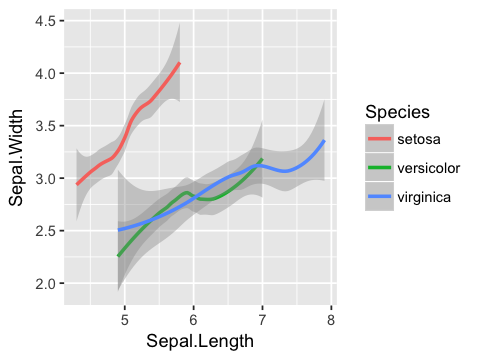

In [7]:
g + geom_smooth()

## Combine geometries

`geom_smooth()` using method = 'loess'


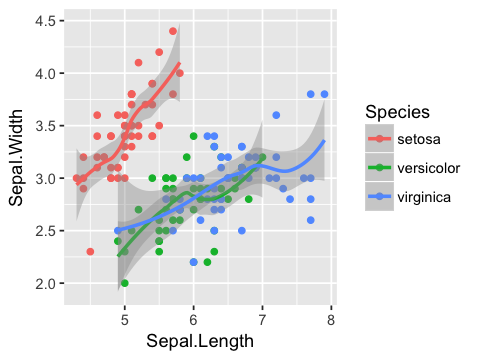

In [8]:
g + geom_point() + geom_smooth()

## Changing labels

`geom_smooth()` using method = 'loess'


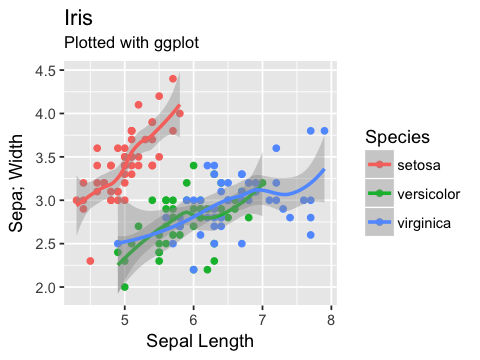

In [9]:
g + geom_point() + geom_smooth() +
labs(x="Sepal Length", y="Sepa; Width", title="Iris", subtitle="Plotted with ggplot")

## Changing scales

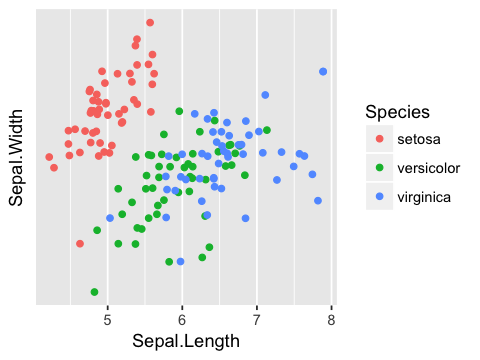

In [10]:
g + 
geom_jitter(width = 0.2) + 
scale_y_log10()

## Group plots using `facets`

In [11]:
g + geom_point() + geom_smooth() +
facet_wrap(~ Species)

`geom_smooth()` using method = 'loess'


`geom_smooth()` using method = 'loess'


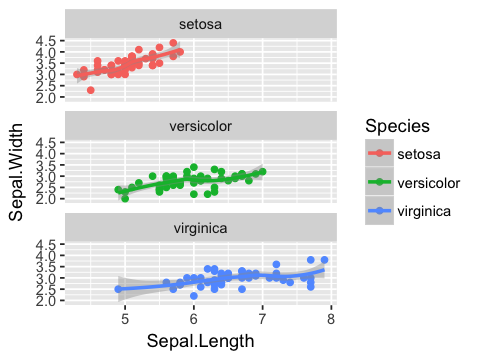

In [12]:
g + geom_point() + geom_smooth() +
facet_wrap(~ Species, ncol = 1)

## Turning `guides` on and off

`geom_smooth()` using method = 'loess'


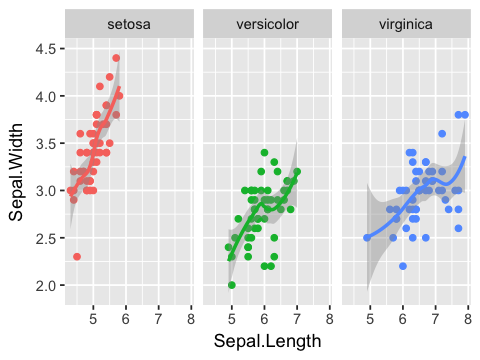

In [13]:
g + geom_point() + geom_smooth() +
facet_wrap(~ Species) +
guides(color=FALSE)

## Reshaping `data.frames` with `gather`  and plotting

In [14]:
iris %>% gather(measure, value, -Species) %>% head

Species measure      value
1 setosa  Sepal.Length 5.1  
2 setosa  Sepal.Length 4.9  
3 setosa  Sepal.Length 4.7  
4 setosa  Sepal.Length 4.6  
5 setosa  Sepal.Length 5.0  
6 setosa  Sepal.Length 5.4

In [15]:
options(repr.plot.width=6, repr.plot.height=4)

In [16]:
g2 <- ggplot(iris %>% gather(measure, value, -Species), 
            aes(x=Species, y=value, fill=Species, color=Species))

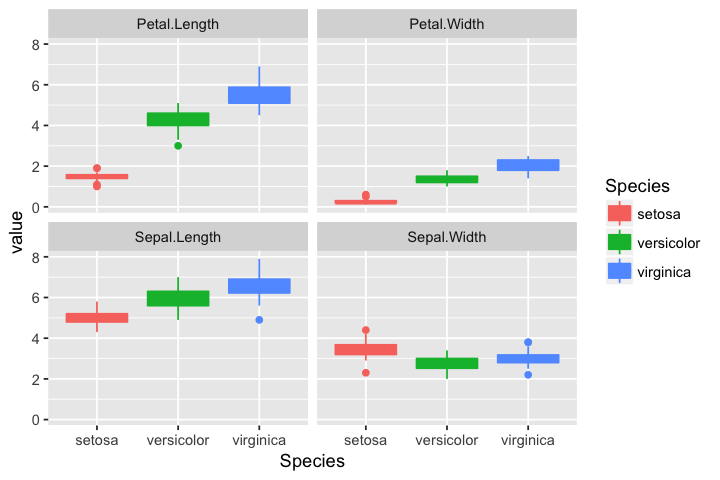

In [17]:
g2 + facet_wrap(~ measure) + geom_boxplot()

In [18]:
g2 + facet_wrap(~ measure) + geom_jitter() 

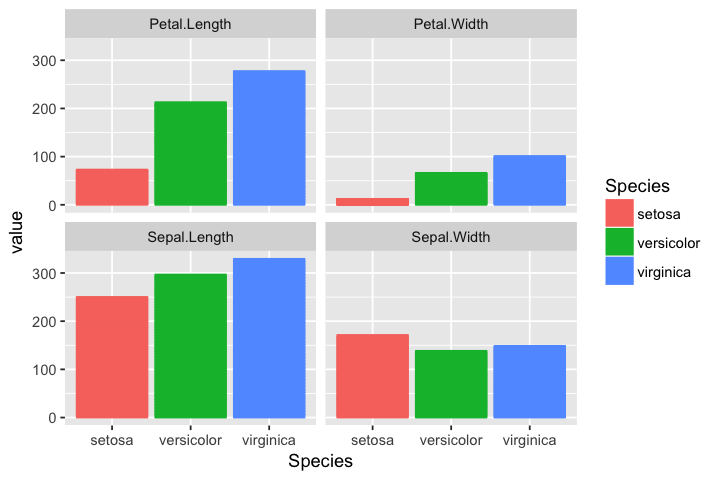

In [19]:
g2 + facet_wrap(~ measure) + geom_bar(stat="identity")

## Allowing different scales for each plot

In [20]:
g2 + facet_wrap(~ measure, scales="free") + geom_boxplot()

## Change coordinates

In [21]:
g2 + 
geom_boxplot() +
coord_flip()

In [22]:
options(repr.plot.width=6, repr.plot.height=6)

In [23]:
polar <- g2 + 
facet_wrap(~ measure) + 
geom_jitter(width = 0.2, size=1) + 
coord_polar() +
guides(color=FALSE, fill=FALSE) +
labs(x="", y="")

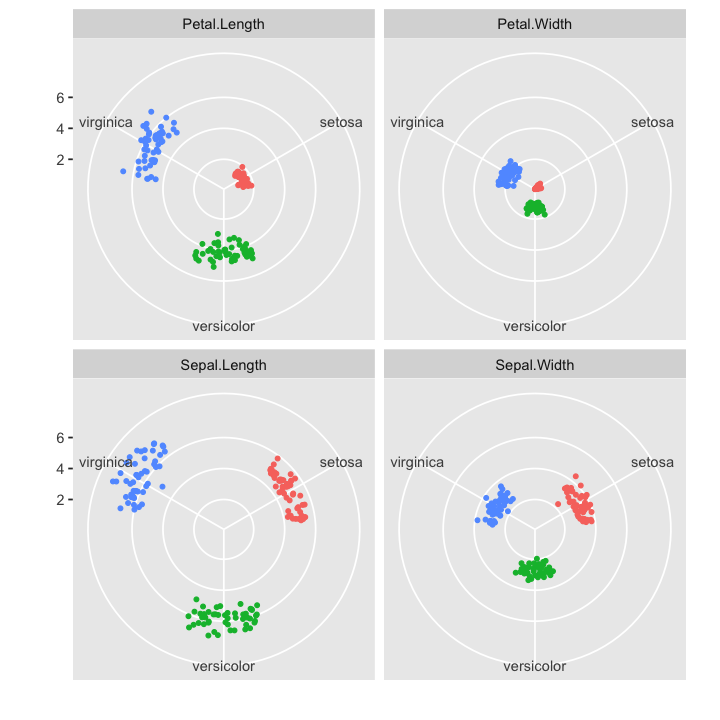

In [24]:
polar

## Transparency

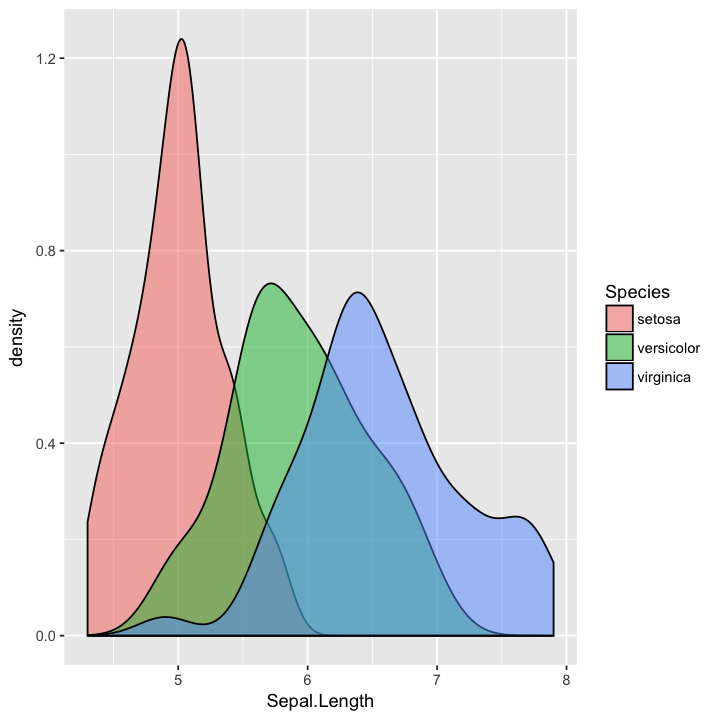

In [25]:
ggplot(iris, aes(x=Sepal.Length, fill=Species)) +
geom_density(alpha=0.5)

## Themes

In [26]:
ggplot(iris, aes(x=Sepal.Length, fill=Species)) +
geom_density(alpha=0.5) + 
theme_bw()

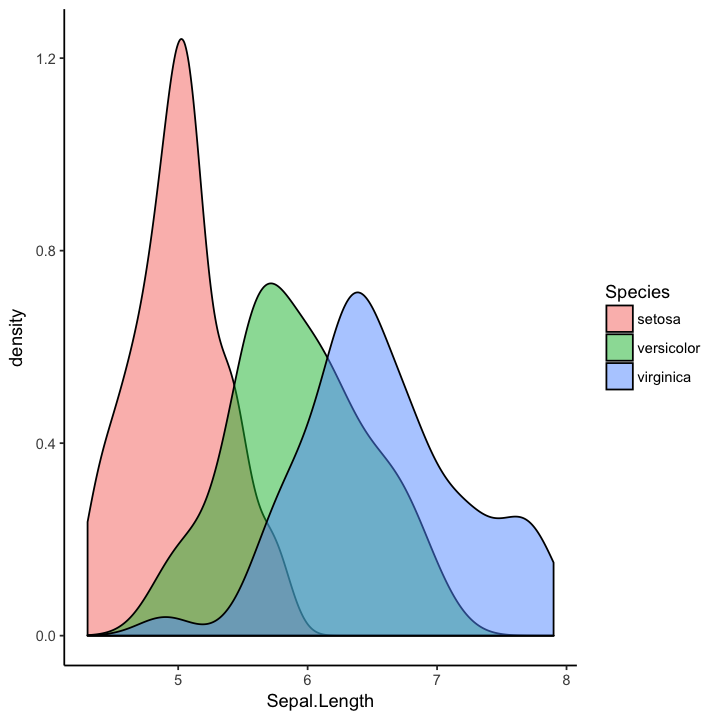

In [28]:
ggplot(iris, aes(x=Sepal.Length, fill=Species)) +
geom_density(alpha=0.5) + 
theme_classic()

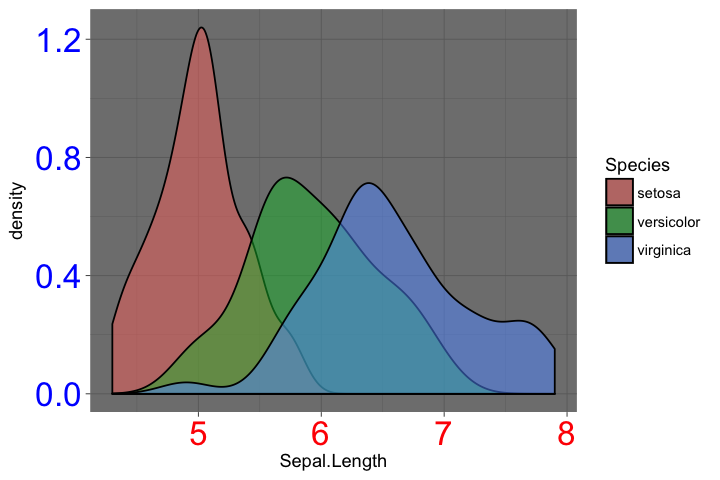

In [247]:
ggplot(iris, aes(x=Sepal.Length, fill=Species)) +
geom_density(alpha=0.5) + 
theme_dark() +
theme(axis.text.x = element_text(colour = 'red', size=20),
      axis.text.y = element_text(color = 'blue', size=20))

## Using color scales

In [62]:
options(repr.plot.width=4, repr.plot.height=3)

### Discrete colors or fills

In [63]:
g3 <- ggplot(iris %>% gather(measure, value, -Species), 
            aes(x=Species, y=value, fill=Species)) +
     geom_bar(stat="identity")

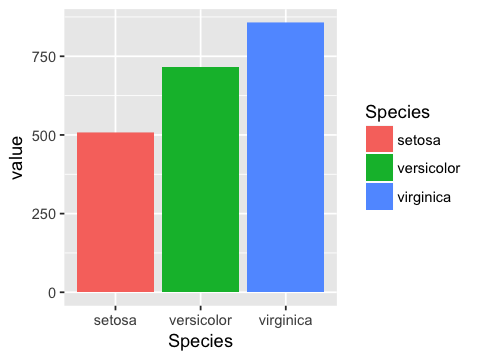

In [64]:
g3

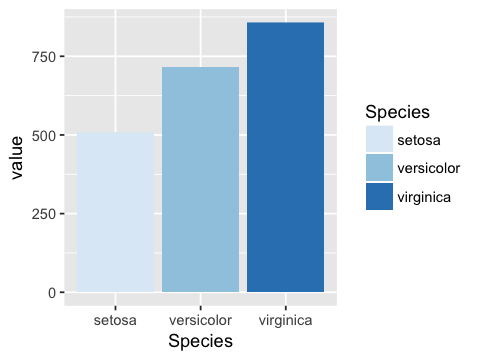

In [69]:
g3 + scale_fill_brewer(type='seq')

In [67]:
g3 + scale_fill_brewer(type='div')

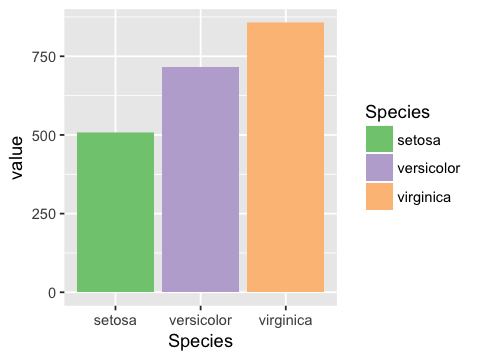

In [68]:
g3 + scale_fill_brewer(type='qual')

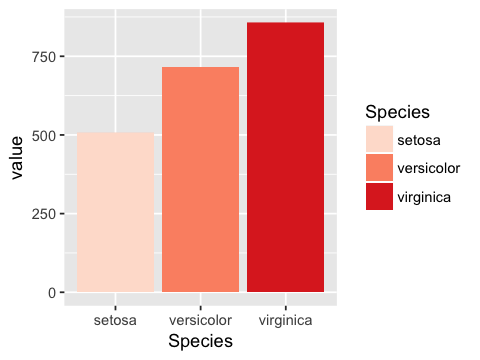

In [71]:
g3 + scale_fill_brewer(type='seq', palette = 'Reds')

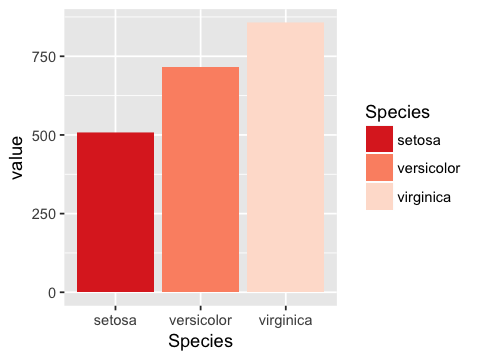

In [76]:
g3 + scale_fill_brewer(type='seq', palette = 'Reds', direction = -1)

### Continuous colors or fills

In [110]:
suppressPackageStartupMessages(library(genefilter))

In [116]:
n <- 20
m <- 50000
EXPRS <- matrix(rnorm(m * 2 * n), m, 2*n)
rownames(EXPRS) <- paste('g', 1:m, sep='')
colnames(EXPRS) <- paste('pt', 1:(2*n), sep='')
grp <- as.factor(rep(c("Control", "Treated"), each=n))

In [117]:
p.values <- rowttests(EXPRS, grp)$p.value
ii <- order(p.values)
TOPEXPRS <- EXPRS[ii[1:100], ]

In [119]:
M <- data.frame(t(TOPEXPRS)) %>% rownames_to_column("pid") %>% gather(gene, expression, -pid)

In [120]:
head(M)

pid gene expression
1 pt1 g156 -0.4724457
2 pt2 g156  0.3118261
3 pt3 g156 -0.4587830
4 pt4 g156 -1.1015636
5 pt5 g156 -0.3718592
6 pt6 g156 -1.0262855

In [165]:
options(repr.plot.width=6, repr.plot.height=4)

In [176]:
g4 <- ggplot(M, aes(gene, pid, fill=expression)) + 
      geom_tile(colour='white') + 
      theme(axis.text.x = element_blank(),
            axis.text.y = element_blank(),
            axis.ticks.x = element_blank(),
            axis.ticks.y = element_blank())

In [177]:
g4

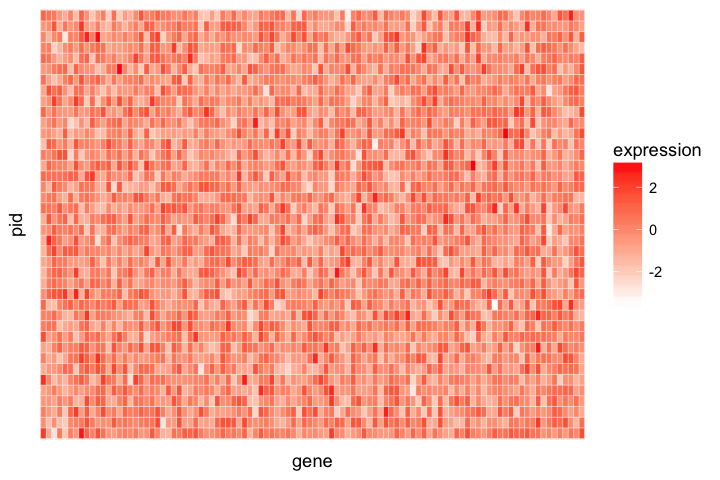

In [178]:
g4 + scale_fill_gradient(low = "white", high="red")

In [188]:
g4 + scale_fill_gradient2(low = "darkgreen", high="darkblue") 

## Saving plots

In [197]:
ggsave('polar.png', polar)

Saving 7 x 7 in image


## Check saved plot

![](polar.png)

## Exercise

Hint: If nothing  is plotted, wrap the entire R expression in a `print()` statement to see the error message.

In [199]:
head(mtcars)

mpg  cyl disp hp  drat wt    qsec  vs am gear carb
Mazda RX4         21.0 6   160  110 3.90 2.620 16.46 0  1  4    4   
Mazda RX4 Wag     21.0 6   160  110 3.90 2.875 17.02 0  1  4    4   
Datsun 710        22.8 4   108   93 3.85 2.320 18.61 1  1  4    1   
Hornet 4 Drive    21.4 6   258  110 3.08 3.215 19.44 1  0  3    1   
Hornet Sportabout 18.7 8   360  175 3.15 3.440 17.02 0  0  3    2   
Valiant           18.1 6   225  105 2.76 3.460 20.22 1  0  3    1

**1**. Make a scatter plot with `y=mpg` and `x=wt`

**2**. Add a linear regression curve.

**3**. Add a title 'Fuel efficiency decreases with weight', and rename the x and y axis to 'Weight' and 'Miles per gallon'.

**4**. Change the color of the scatter points to `salmon`.

**5**. Change the color of the scatter points to represent the horsepower `hp`.

**6**. Use color brewer to set the scale in Q4 with the `Oranges` seqeuntial palette for the `cyl` variable.

**7**. Make a density plot of `mpg` and fill by the factor `cyl`, and set the transparecny to 0.5.

**8**. Repeat Q7, but use 3 separate plots. Remove the legend.

**9**. Create a scatter plot -log(p value) on the y-axis and SNP location on the x-axis, coloring by chromosome number. This is known as a Manhattan plot. Use the code below to simulate data for the plot. Use the `Set3` palette of `qual` type in `scale_color_brewer` for the color scheme.

```R
n <- 10000 # number of genes
position <- 1:n
chromosome <- factor(rep(1:10, each=n/10))
p.value <- runif(n)
df <- data.frame(position=position, chromosome=chromosome, p.value=p.value)
```